<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/04-Mi-primer-modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi primer modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos simulados. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Los paquetes necesarios son:

In [14]:
# Paquetes necesarios
import numpy as np  # Para generación de datos y operaciones numéricas
import pandas as pd  # Para manejo de datos estructurados
import matplotlib.pyplot as plt  # Para visualización de datos
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Para evaluación del modelo
from sklearn.model_selection import train_test_split

---
## <font color='264CC7'> Datos </font>


Utilicemos datos ficticios:

In [15]:
# Datos proporcionados
x = [5, 7, 8, 9, 2, 17, 3, 10, 4, 11, 12, 16, 6]
y = [99, 86, 87, 88, 90, 86, 80, 87, 94, 78, 77, 85, 86]

# Crear un DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y
})

# Mostrar los datos
display(df)

,x,y
0,5,99
1,7,86
2,8,87
3,9,88
4,2,90
5,17,86
6,3,80
7,10,87
8,4,94
9,11,78


Grafiquemos su dispersión:

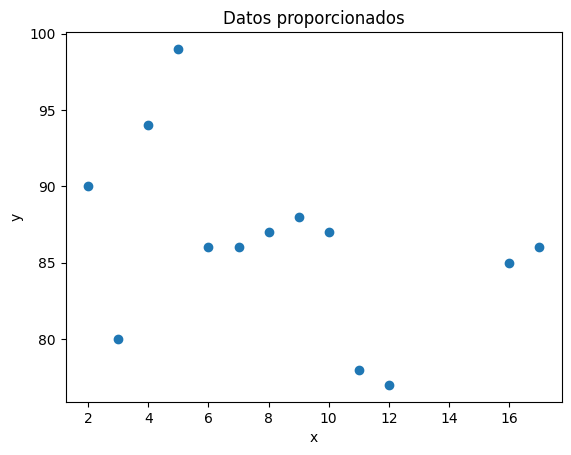

In [16]:
# Gráfico de dispersión de df
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos proporcionados')
plt.show()


---
## <font color='264CC7'> Características y etiquetas </font>

Ahora, separamos las características y las etiquetas.

In [17]:
# Dividir el conjunto de datos en características y etiquetas
features = ['x']
X = df.loc[:, features] # caracteristicas
y = df.loc[:, ['y']] # variable objetivo

---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Con esto, dividimos los datos en dos conjuntos: uno para entrenamiento y otro para prueba.

In [18]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # siempre poner la semilla random_state

Ahora, visualizamos el tamaño de los conjuntos de entrenamiento y prueba.

In [19]:
# Reviso las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (9, 1)
y_train: (9, 1)
X_test: (4, 1)
y_test: (4, 1)


---
## <font color='264CC7'> Entrenamiento </font>

Definimos un modelo de regresión lineal y lo entrenamos con los datos de entrenamiento.

In [20]:
# Crear el modelo y ajustarlo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Visualizar los coeficientes
print('Ecuación de la recta:')
print('y =', modelo.coef_[0][0], 'x +', modelo.intercept_[0])


Ecuación de la recta:
y = -0.8218181818181818 x + 94.92


Visualizamos el modelo entrenado.

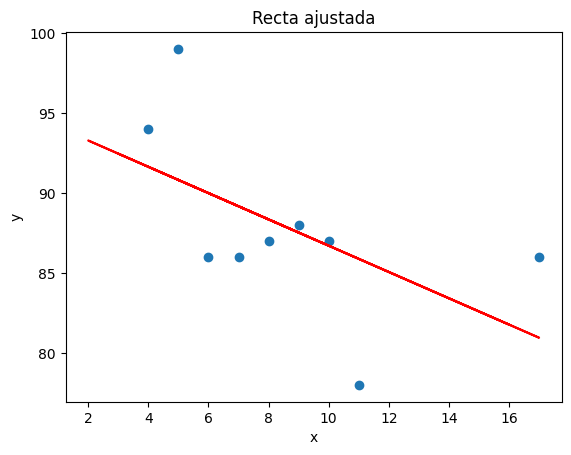

In [21]:
# Graficar la recta
plt.scatter(X_train, y_train)
plt.plot(X, modelo.coef_[0][0] * X + modelo.intercept_[0], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta ajustada')
plt.show()


---
## <font color='264CC7'> Evaluacion </font>

Realizamos predicciones con el conjunto de prueba y evaluamos el modelo.

In [22]:
# Predicciones del modelo
y_pred = modelo.predict(X_test)

# Comparar las predicciones con los datos de prueba
df_predicciones = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicción': y_pred.flatten()
})
display(df_predicciones)

,Actual,Predicción
0,80,92.454545
1,85,81.770909
2,90,93.276364
3,77,85.058182


Veamos en un gráfico cómo se comparan las predicciones con las etiquetas reales.

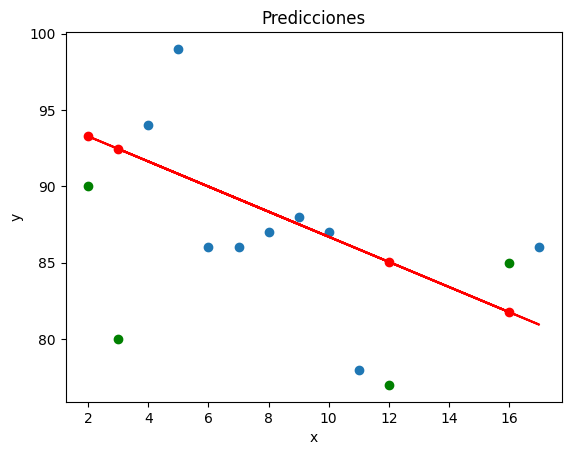

In [23]:
# Graficar las predicciones
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='g')
plt.scatter(X_test, y_pred, color='r')
plt.plot(X, modelo.coef_[0][0] * X + modelo.intercept_[0], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicciones')
plt.show()


Calculamos el error cuadrático medio.

In [24]:
# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)

print('Error cuadrático medio:', mse)

Error cuadrático medio: 60.3028958677686


# Modelo de regresión cuadrático


,x,y
0,5,20
1,10,40
2,15,60
3,20,10
4,25,20
5,30,18
6,35,12
7,40,20
8,45,24
9,50,21


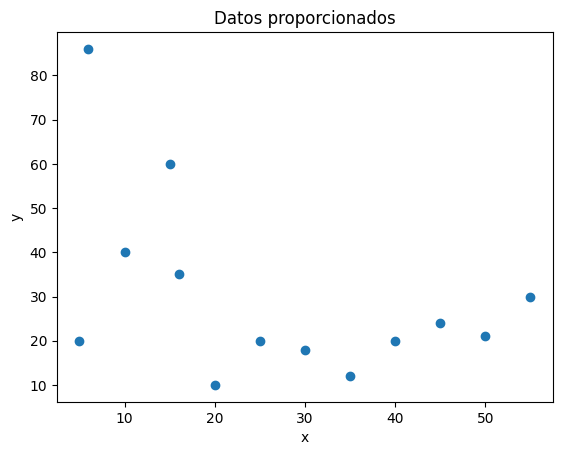

Dimensiones de los conjuntos de datos:
X_train_poly: (9, 2)
y_train: (9, 1)
X_test_poly: (4, 2)
y_test: (4, 1)
Ecuación del modelo cuadrático aproximada:
y = -2.4514898225919404 * x + 0.031934266346486766 * x^2 + 65.7045218178234


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


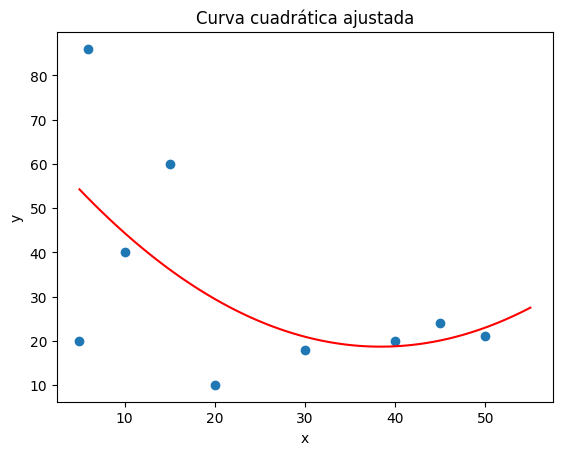

,Actual,Predicción
0,12,19.021854
1,35,34.655857
2,20,24.376193
3,30,27.473737


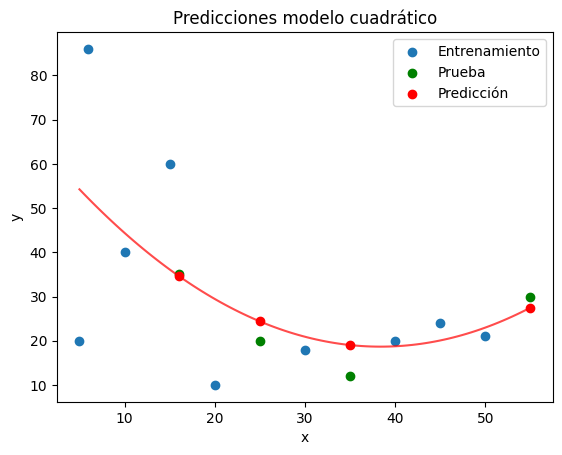

Error cuadrático medio: 18.739484607207952


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Datos proporcionados
x = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 16, 6]
y = [20, 40, 60, 10, 20, 18, 12, 20, 24, 21, 30, 35, 86]

# Crear un DataFrame
dc = pd.DataFrame({
    'x': x,
    'y': y
})

# Mostrar los datos
display(dc)

# Gráfico de dispersión de dc
plt.scatter(dc['x'], dc['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos proporcionados')
plt.show()

# Dividir el conjunto de datos en características y etiquetas
features = ['x']
X = dc.loc[:, features]  # características
y = dc.loc[:, ['y']]     # variable objetivo

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)  # siempre poner la semilla random_state

# Transformación polinómica (REGRESIÓN CUADRÁTICA)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Reviso las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print('X_train_poly:', X_train_poly.shape)
print('y_train:', y_train.shape)
print('X_test_poly:', X_test_poly.shape)
print('y_test:', y_test.shape)

# Crear el modelo y ajustarlo (ahora con variables polinómicas)
modelo = LinearRegression()
modelo.fit(X_train_poly, y_train)

# Visualizar los coeficientes (para x y x^2)
print('Ecuación del modelo cuadrático aproximada:')
print('y =', modelo.coef_[0][0], '* x +', modelo.coef_[0][1], '* x^2 +', modelo.intercept_[0])

# Graficar la curva cuadrática ajustada
plt.scatter(X_train, y_train)

# Generar una malla de puntos para dibujar la curva
X_line = np.linspace(dc['x'].min(), dc['x'].max(), 100).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = modelo.predict(X_line_poly)

plt.plot(X_line, y_line, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curva cuadrática ajustada')
plt.show()

# Predicciones del modelo (usando X_test polinómico)
y_pred = modelo.predict(X_test_poly)

# Comparar las predicciones con los datos de prueba
df_predicciones = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicción': y_pred.flatten()
})
display(df_predicciones)

# Graficar las predicciones
plt.scatter(X_train, y_train, label='Entrenamiento')
plt.scatter(X_test, y_test, color='g', label='Prueba')
plt.scatter(X_test, y_pred, color='r', label='Predicción')
plt.plot(X_line, y_line, 'r', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicciones modelo cuadrático')
plt.legend()
plt.show()

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)
